In [28]:
# Get environment variables from .env file
from dotenv import load_dotenv
import os

load_dotenv()

CONSUMER_KEY = os.environ.get("CONSUMER_KEY")
CONSUMER_SECRET = os.environ.get("CONSUMER_SECRET")
ACCESS_TOKEN = os.environ.get("ACCESS_TOKEN")
ACCESS_TOKEN_SECRET = os.environ.get("ACCESS_TOKEN_SECRET")

In [4]:
#This program gets the sentiment of Lisk from Twitter users.
#By using the Twitter API, we can retrieve tweets and make a sentiment
#analysis of Lisk's price. 
#Import the libraries
import tweepy
from textblob import TextBlob
import sys
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [32]:
#Get the Twitter API credentials
auth_handler = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth_handler.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth_handler, wait_on_rate_limit=True)


In [36]:
#Gather the tweets about Bitcoin and filter out any retweets 'RT' (From 1st January 2022 till today's date)
search_term = '#lisk -filter:retweets'
#Create a cursor object

search_result = api.search_tweets(q=search_term, lang='en', since= '2022-01-01', tweet_mode= 'extended')

# tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since= '2022-01-01', tweet_mode= 'extended').items(2000)
#Store the tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in search_result]

Unexpected parameter: since


In [37]:
#Create a dataframe to store the tweets with a column called 'Tweets'
df = pd.DataFrame(all_tweets, columns = ['Tweets'])
#Show the first 5 rows of data
df.head(5)

,Tweets
0,👉👉click: https://t.co/o8CcJ3OwtK👈\n20% OFF Cli...
1,👉👉click: https://t.co/o8CcJ3OwtK👈\n20% OFF Cli...
2,"31,507 #LSK have been transferred from\nBitFly..."
3,Hallar is hiring! We want to expand our team i...
4,👉👉click: https://t.co/o8CcJ3OwtK👈\n20% OFF Cli...


In [39]:
#Create a function to clean the tweets
def cleanTwt(twt):
  twt = re.sub('#lisk', 'lisk', twt) #Removes the '#' from bitcoin
  twt = re.sub('#Lisk', 'Lisk', twt) #Removes the '#' from Bitcoin
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #Removes any strings with a '#'
  twt = re.sub('\\n', '', twt) #Removing the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #Removes any hyperlinks
  return twt

In [40]:
#Clean the tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
#Show the data set
df.head(10)

,Tweets,Cleaned_Tweets
0,👉👉click: https://t.co/o8CcJ3OwtK👈\n20% OFF Cli...,👉👉click: OFF Click on Binance link to kicksta...
1,👉👉click: https://t.co/o8CcJ3OwtK👈\n20% OFF Cli...,👉👉click: OFF Click on Binance link to kicksta...
2,"31,507 #LSK have been transferred from\nBitFly...","31,507 have been transferred fromBitFlyer Col..."
3,Hallar is hiring! We want to expand our team i...,Hallar is hiring! We want to expand our team i...
4,👉👉click: https://t.co/o8CcJ3OwtK👈\n20% OFF Cli...,👉👉click: OFF Click on Binance link to kicksta...
5,I share it for those who haven't seen it.\n$qy...,I share it for those who haven't seen it.$qyou...
6,👉👉https://t.co/o8CcJ3OwtK👈👈\n20% OFF Click on ...,👉👉 OFF Click on Binance link to kickstart cryp...
7,👉👉https://t.co/o8CcJ3wnfC👈👈\n20% OFF Click on ...,👉👉 OFF Click on Binance link to kickstart cryp...
8,👉👉https://t.co/o8CcJ3OwtK👈👈\n20% OFF Click on ...,👉👉 OFF Click on Binance link to kickstart cryp...
9,To all @JavaScript developers who want to star...,To all @JavaScript developers who want to star...


In [41]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity
#Create 2 columns 'Subjectivity' and 'Polarity'
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)
#Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,👉👉click: https://t.co/o8CcJ3OwtK👈\n20% OFF Cli...,👉👉click: OFF Click on Binance link to kicksta...,0.000,0.000
1,👉👉click: https://t.co/o8CcJ3OwtK👈\n20% OFF Cli...,👉👉click: OFF Click on Binance link to kicksta...,0.000,0.000
2,"31,507 #LSK have been transferred from\nBitFly...","31,507 have been transferred fromBitFlyer Col...",0.925,-0.175
3,Hallar is hiring! We want to expand our team i...,Hallar is hiring! We want to expand our team i...,0.000,0.000
4,👉👉click: https://t.co/o8CcJ3OwtK👈\n20% OFF Cli...,👉👉click: OFF Click on Binance link to kicksta...,0.000,0.000


In [42]:
#Create a function to get the text sentiment
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [43]:
#Create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)
#Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,👉👉click: https://t.co/o8CcJ3OwtK👈\n20% OFF Cli...,👉👉click: OFF Click on Binance link to kicksta...,0.000,0.000,Neutral
1,👉👉click: https://t.co/o8CcJ3OwtK👈\n20% OFF Cli...,👉👉click: OFF Click on Binance link to kicksta...,0.000,0.000,Neutral
2,"31,507 #LSK have been transferred from\nBitFly...","31,507 have been transferred fromBitFlyer Col...",0.925,-0.175,Negative
3,Hallar is hiring! We want to expand our team i...,Hallar is hiring! We want to expand our team i...,0.000,0.000,Neutral
4,👉👉click: https://t.co/o8CcJ3OwtK👈\n20% OFF Cli...,👉👉click: OFF Click on Binance link to kicksta...,0.000,0.000,Neutral


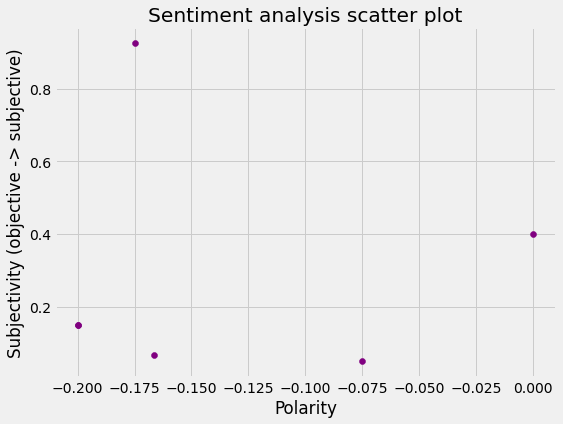

In [44]:
#Create a scatter plot to show the subjectivity and polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Purple')
plt.title('Sentiment analysis scatter plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective -> subjective)')
plt.show()

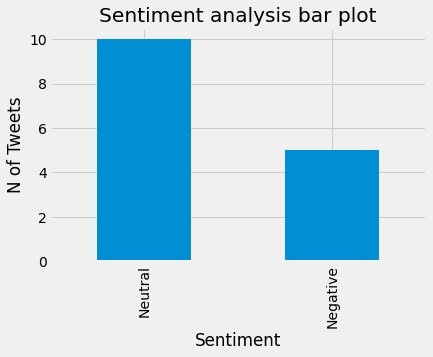

In [45]:
#Create a bar chart to show the count of Positive, Neutral and Negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment analysis bar plot')
plt.xlabel('Sentiment')
plt.ylabel('N of Tweets')
plt.show()